# 最小二乘法

找打一组 $w(w_0,w_1,w_2,...,w_n)$使得$\sum_{i=1}^n(h(x_i)-y_i)^2$最小
即求： $min\sum_{i=1}^n(h(x_i)-y_i)^2$

In [17]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

numpy.poly1d([1,2,3]) 生成  $1x^2+2x^1+3x^0$

In [18]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [19]:
# 生成数据
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

# 加上正态分布噪音的目标函数值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

# n为多项式次数
def fitting(M=0):
    #随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsp = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsp[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsp[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    
    return p_lsp

Fitting Parameters: [-0.01171789]


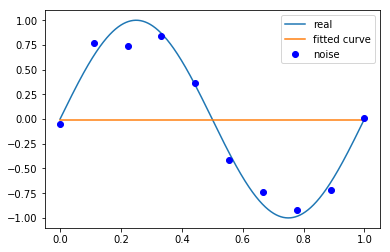

In [20]:
# M=0
p_lsp_0 = fitting(M=0)

Fitting Parameters: [-1.29260853  0.63458638]


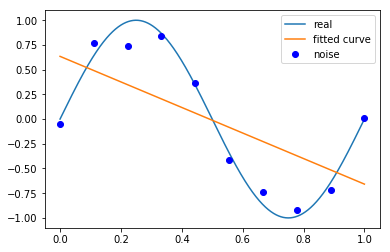

In [21]:
# M=1
p_lsp_0 = fitting(M=1)

Fitting Parameters: [ 19.75059955 -29.64324568   9.96551113  -0.05072023]


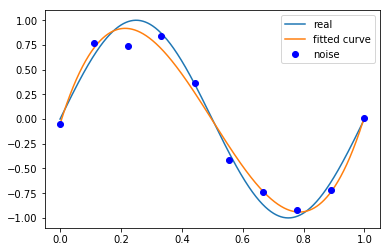

In [22]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-1.37813165e+04  5.79225092e+04 -9.97829268e+04  9.03418090e+04
 -4.56253056e+04  1.24409176e+04 -1.53840323e+03  8.94255941e+00
  1.38285556e+01 -4.53647529e-02]


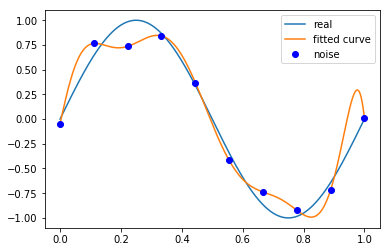

In [23]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

# 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

L1: regularization*abs(p)

L2: sqrt(0.5 * regularization * np.square(p))

In [24]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p)))   # 以L2范数作为正则化项
    return ret

In [25]:
# 最小二乘法，加正则化项
p_init = np.random.rand(9+1)
p_lsp_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

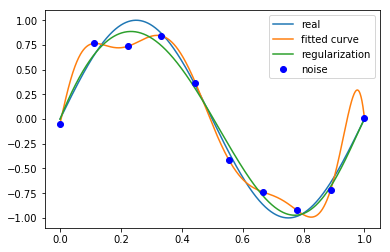

In [27]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsp_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()